In [24]:
import plotly.figure_factory as ff
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
import pandas as pd

def import_data():
    sample_data_UNC = 'C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/h1.csv'
    sample_data_list = pd.read_csv(sample_data_UNC)
    
    feature_rows = sample_data_list.Boundary
    sample_data_list.pop("Boundary") #get rid of boundary labels/col
    
    sample_data = np.array(sample_data_list, dtype = object) #convert data types to objects for manipulation
    
    feature_rows = np.array(feature_rows, dtype = object)
    feature_columns = np.array(['CTCF', 'DNase', 'H2A', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1'], dtype = object)

    
    return sample_data, feature_rows, feature_columns, sample_data_list #data[0] = numpy.ndarray, data[3] = pandas df

In [26]:
data = import_data()

# Stat Data

In [27]:
data_pts = data[3] #df object for .describe()

#data = np.array(data, dtype=np.float32)
#col_names = np.dtype(data[2].names)
#labels = col_names.dtype(col_names)

statData = data_pts


statData.describe(percentiles=None,
                  include = 'all'
                 )

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,164.740477,224.263978,148.377955,150.663993,143.028997,196.713766,120.457940,159.940284,166.703290,162.036483,147.821026,143.561630,182.337875
std,101.039152,128.615555,64.940313,92.562052,206.279585,163.110501,62.129283,173.408019,207.744977,70.035695,80.764357,69.046818,81.530219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.352500,140.002500,102.017500,103.457500,87.297500,102.247500,80.002500,54.302500,68.700000,126.882500,108.262500,114.622500,131.247500
50%,133.800000,198.290000,146.765000,131.655000,111.760000,126.260000,109.650000,86.710000,80.140000,155.415000,134.085000,133.825000,170.725000
75%,219.782500,274.690000,195.080000,172.942500,145.167500,234.587500,151.555000,198.290000,113.227500,185.125000,161.540000,157.220000,226.400000
max,673.590000,1843.490000,368.030000,1144.940000,3947.380000,1266.890000,479.310000,1209.260000,1810.500000,898.730000,831.540000,992.720000,650.610000


# Cophenetic Correlation Coefficient

In [28]:
#from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z_linkage_Matrix = linkage(data_pts, 'average', metric='euclidean')
c, coph_dists = cophenet(Z_linkage_Matrix, pdist(data_pts))
c

0.9001333140714608

In [29]:
Z_linkage_Matrix = linkage(data_pts, 'average', metric='cosine') #create linkage matrix for cpcc
c, coph_dists = cophenet(Z_linkage_Matrix, pdist(data_pts))
c

0.5594144811464128

# Slice Distance

In [30]:
#data_pts = data_pts.transpose() #basically... matrix of "cols" ((13)rows:(9000)cols)
#euclidean_slice_distance = 1000
cosine_slice_distance = 0.38

# Cluster Data

In [31]:
from scipy.cluster.hierarchy import fcluster

#euclidean distance = 1055 - 7 clusters
#cosine_slice_distance = 0.26
###distance :
###Forms flat clusters so that the original observations in each flat cluster have no greater a cophenetic distance than t.
clusters = fcluster(Z_linkage_Matrix, cosine_slice_distance, criterion='distance')
###inconsistent :
###inconsistent: If a cluster node and all its descendants have an inconsistent value less than or equal to t, then all its leaf descendants belong to the same flat cluster. 
###When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
###inconsistency = (cluster_height - average) / standard_deviation
#clusters = fcluster(Z_linkage_Matrix, 3, depth = 100)

#print(clusters, sep='\n')
max_clusters = max(clusters)

print("Range = 1 -> n. Max clusters: ", max_clusters, "\n")
print(len(clusters), "cluster labels \n")
print(", ".join(str(x) for x in clusters))

Range = 1 -> n. Max clusters:  5 

2602 cluster labels 

3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

# Create Dendrogram

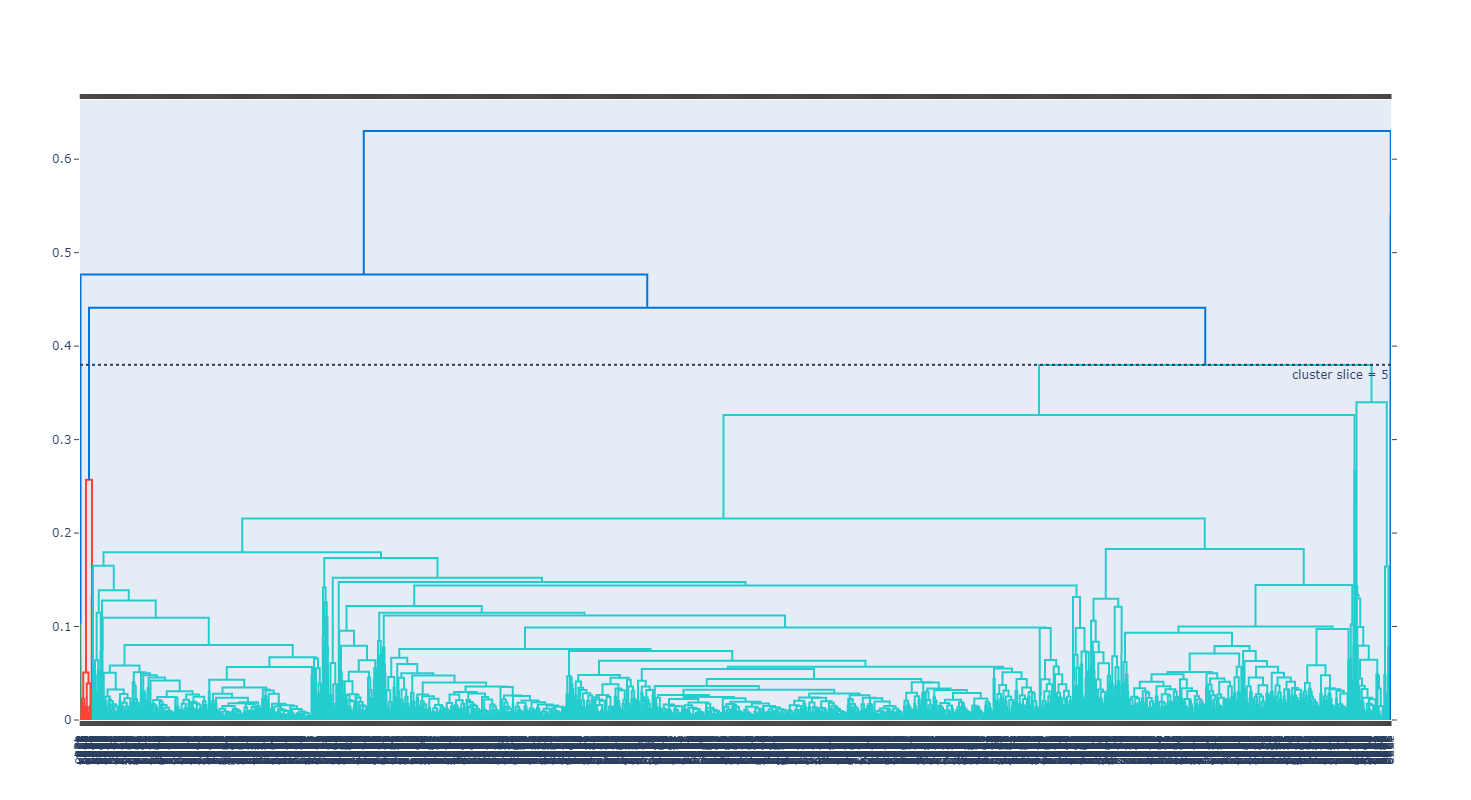

In [32]:
dendro_plt = ff.create_dendrogram(data[0], 
                           #orientation='left',
                           linkagefun=lambda x: linkage(data_pts, 'average', metric='cosine'),
                           #distfun='euclidean', 
                           color_threshold=cosine_slice_distance)
dendro_plt.add_hline(y = cosine_slice_distance, line_dash = "dot", annotation_text = (f"cluster slice = {max_clusters}"), annotation_position = "bottom right")
#dendro_plt.add_hline(y = 0.23, line_dash = "dot", annotation_text = "cluster slice", annotation_position = "bottom right")
#dendro_plt.add_hline(y = 460, line_dash = "dot", annotation_text = "c.s. = 8", annotation_position = "bottom right")
#dendro_plt.add_hline(y = 425, line_dash = "dot", annotation_text = "c.s = 10", annotation_position = "bottom right")
#dendro_plt.add_hline(y = (3054*0.255), line_dash = "dot", annotation_text = "c.s = 7", annotation_position = "bottom right")
dendro_plt.update_layout(width=1500, height=800)
dendro_plt.show()

# KMeans Elbow Plot

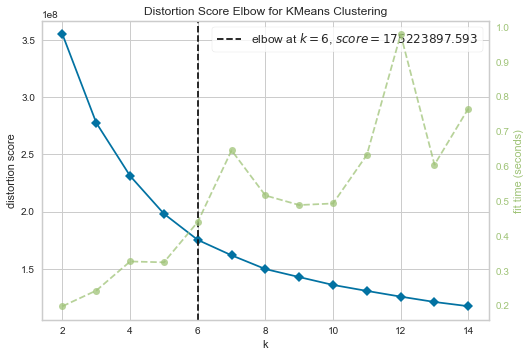

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Elbow Method for K means
# Import ElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'distortion', timings= True)
visualizer.fit(data_pts)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# KMeans Silhouette

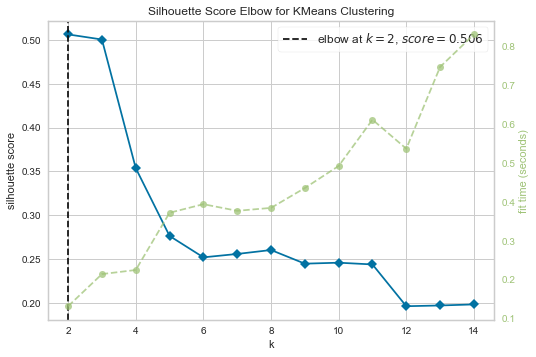

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings= True)
visualizer.fit(data_pts)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# Silhouette Visualization

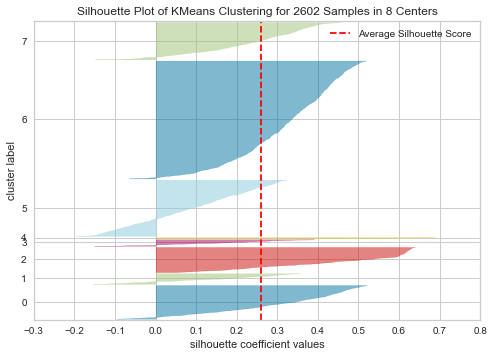

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2602 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_pts)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=15)
    cluster_labels = clusterer.fit_predict(data_pts)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_pts, cluster_labels)
    print(n_clusters," clusters - "
          "Average silhouette score:", silhouette_avg)

2  clusters - Average silhouette score: 0.5063859563220134
3  clusters - Average silhouette score: 0.5005669751423013
4  clusters - Average silhouette score: 0.3531925169861949
5  clusters - Average silhouette score: 0.28577426889177643
6  clusters - Average silhouette score: 0.2504147842321738
7  clusters - Average silhouette score: 0.2579093586721709
8  clusters - Average silhouette score: 0.25965741373941614


# Unordered Heatmap

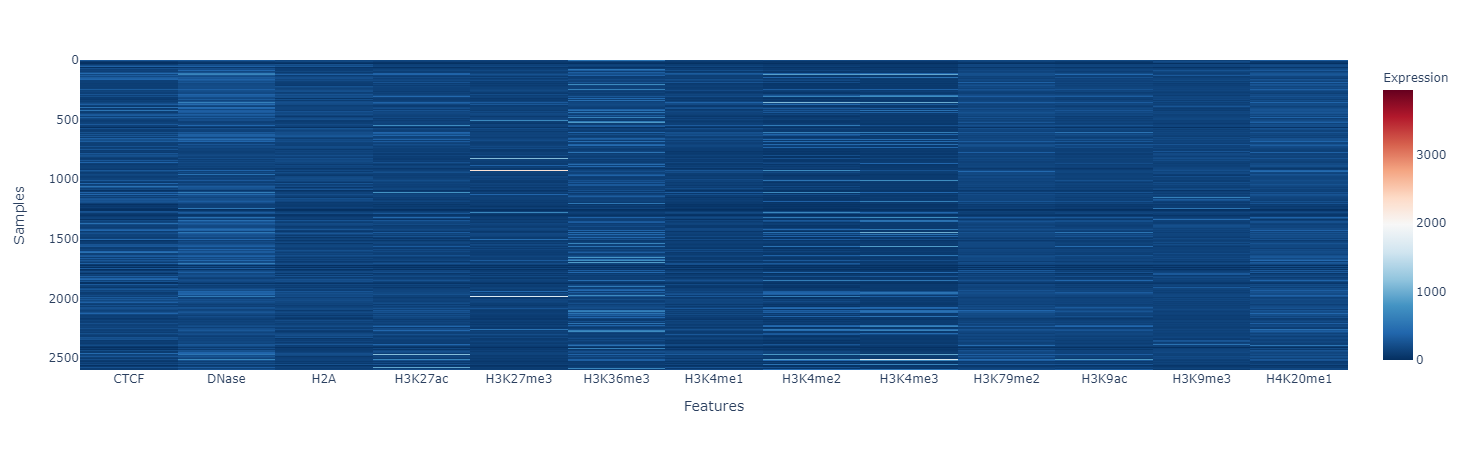

In [14]:
import plotly.express as px
from sklearn.preprocessing import normalize

dataL = data[2].tolist()
xList = dataL

#normalize data (fits cosine)
#normalize([xList], norm="l1")


uo_hm_fig = px.imshow(data[0],
                labels=dict(x="Features", y="Samples", color="Expression"),
                #template = 'plotly',
                color_continuous_scale='RdBu_r', #RdBu,
                x=xList 
                #y=]
               )

uo_hm_fig.show()

# Ordered Clustermap

In [15]:
import pandas as pd
import seaborn as sns

import scipy
from scipy.spatial import distance
from scipy.cluster import hierarchy

dataL = data[0].tolist()

C:\Users\PKchu\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



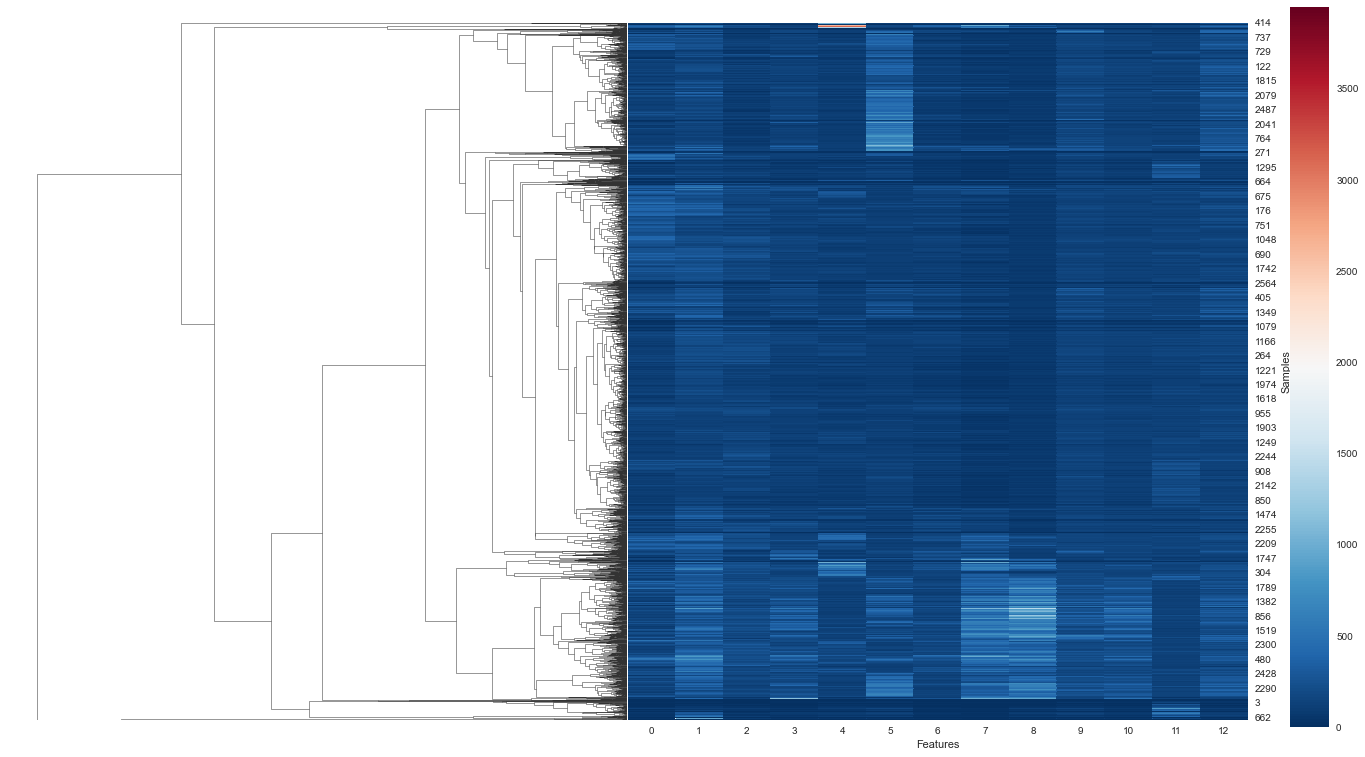

In [16]:
#sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1], z_score=0)
sample_cluster_map = sns.clustermap(dataL, cmap = 'RdBu_r', #plasma, RdBu
                                   figsize=(18, 20), #linewidths = 0.001,
                                   metric = 'cosine', row_cluster = True,
                                    col_cluster=False,
                                   #row_colors = row_colors,
                                   dendrogram_ratio=(.5, .5),
                                   cbar_pos=(1, 0.015, .03, .5),
                                   #z_score=1 standardize z-score - 0(rows) 1(cols)
                                    #subtract the minimum and divide each by its maximum
                                   )
#‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’,‘euclidean’, ‘hamming’, ‘jaccard’,‘kulsinski’, ....
sample_cluster_map.ax_heatmap.set_xlabel('Features')
sample_cluster_map.ax_heatmap.set_ylabel('Samples')
sample_cluster_map.ax_col_dendrogram.remove()

#plt.savefig(out_pdf)
###   access linkage matricies for rows/columns   ###
#clustmap = sns.clustermap(df, metric="correlation")
#clustmap.dendrogram_col.linkage # linkage matrix for columns
#clustmap.dendrogram_row.linkage # linkage matrix for rows


# Dendrogram + Correlation Map

In [17]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = np.genfromtxt('C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/h1.csv',
                     names=True,usecols=tuple(range(0,13)),dtype=float, delimiter=",")

#dendro_plt = ff.create_dendrogram(data_pts, 
#                           #orientation='left',
#                           linkagefun=lambda x: linkage(data_pts, 'average', metric='euclidean'),
#                           #distfun='euclidean', 
#                           color_threshold=200)
#dendro_plt.update_layout(width=1000, height=800)
#dendro_plt.show()

In [18]:
data_array = data.view((np.float, len(data.dtype.names)))

data_array

array([[ 29.78, 172.84,  98.12, ..., 175.24, 111.69, 205.66],
       [151.57, 164.53, 278.42, ..., 146.66, 222.04, 192.03],
       [  0.  ,   8.15,   7.11, ...,   1.36,  43.39,   8.72],
       ...,
       [171.09, 171.62, 175.75, ..., 104.6 , 104.08, 115.44],
       [  0.  ,   3.05,   7.11, ...,   2.72,   1.88,   9.77],
       [ 81.5 , 146.25,  81.17, ...,  89.93, 333.04,  99.67]])

In [19]:
data_array = data_array.transpose()

#data_array.shape
data_array

array([[ 29.78, 151.57,   0.  , ..., 171.09,   0.  ,  81.5 ],
       [172.84, 164.53,   8.15, ..., 171.62,   3.05, 146.25],
       [ 98.12, 278.42,   7.11, ..., 175.75,   7.11,  81.17],
       ...,
       [175.24, 146.66,   1.36, ..., 104.6 ,   2.72,  89.93],
       [111.69, 222.04,  43.39, ..., 104.08,   1.88, 333.04],
       [205.66, 192.03,   8.72, ..., 115.44,   9.77,  99.67]])

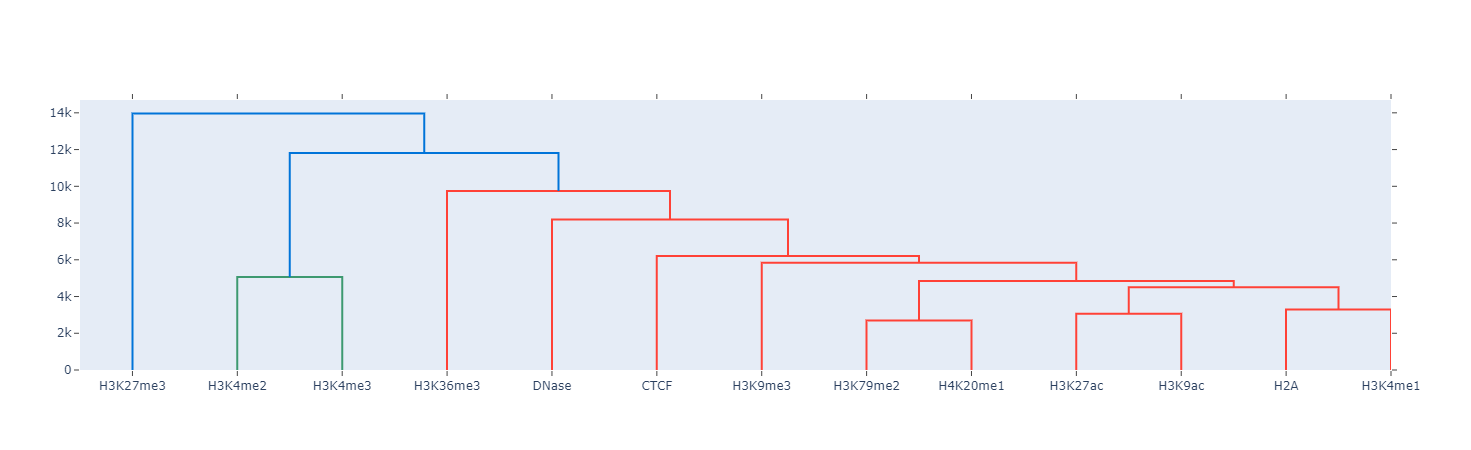

In [20]:
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
dendro_plt = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)

dendro_plt.show()

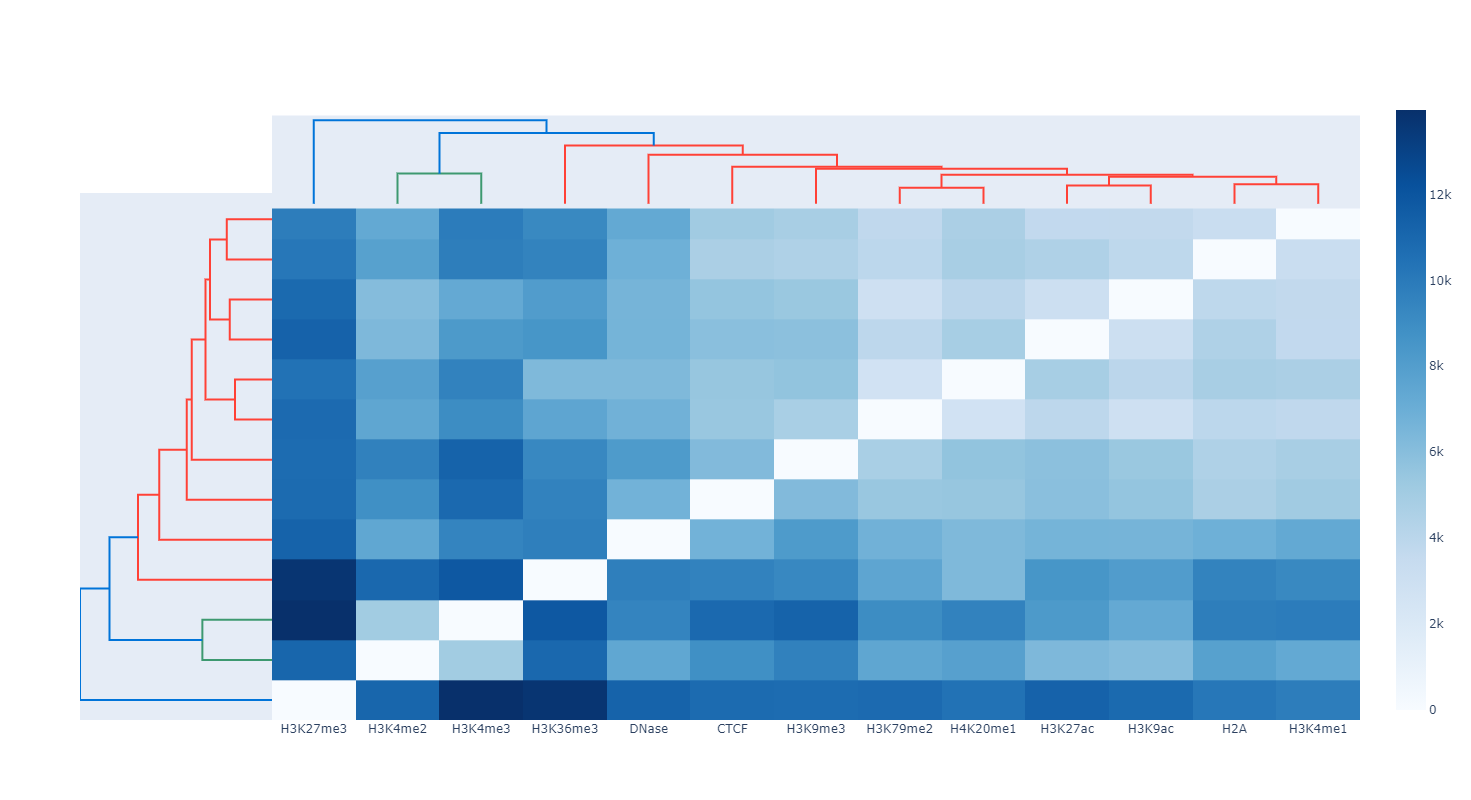

In [21]:

for i in range(len(dendro_plt['data'])):
    dendro_plt['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    dendro_plt.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = dendro_plt['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    dendro_plt.add_trace(data)

# Edit Layout
dendro_plt.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
dendro_plt.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
dendro_plt.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
dendro_plt.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
dendro_plt.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
dendro_plt.show()